<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/K_means_recreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""

Algortimo de Clustering k-means

Fecha de entrega 15 de agosto de 2023

"""

import matplotlib.pyplot as plt
import random as random
import numpy as np
from sklearn.datasets import make_blobs
import math as mt
import copy


In [2]:
#definimos la función distancia que recibe 2 vectores 2D y calcula la distancia entre ellos
def distance(x1,x2):
    dx=x2[0]-x1[0]
    dy=x2[1]-x1[1]
    return mt.sqrt(dx**2+dy**2)


In [3]:
#Inicializamos los clusters
num_samples=300
num_centers=3
X,y_true=make_blobs(n_samples=num_samples,centers=num_centers,
                    cluster_std=0.90,random_state=3)


In [4]:
#mu_x & mu_y son las coordenadas de los centroides en x,y
mu_x=np.zeros(num_centers)
mu_y=np.zeros(num_centers)
for i in range(num_centers):
    n=random.randint(0,num_samples-1)
    mu_x[i]=X[n][0]
    mu_y[i]=X[n][1]
num_iteraciones=0


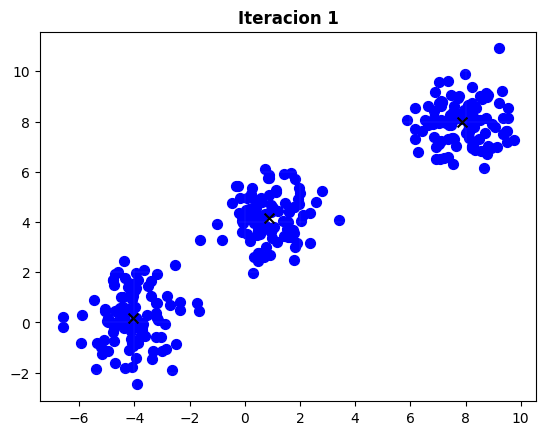

In [8]:
while(True):

    #repetiremos hasta que los centroides queden fijos

    #Llenamos  la matriz gamma de ceros y después le asignamos la unos
    distances=np.zeros(num_centers)
    gamma=np.zeros((num_samples, num_centers))
    for i in range(num_samples):
        for j in range(num_centers):
            distances[j]=distance([mu_x[j],mu_y[j]],[X[i,0],X[i,1]])
        for j in range(num_centers):
            if (distances[j]==distances.min()):
                gamma[i][j]=1
                break
     #hacemos una deep copy de los centroides para después comparar
    old_x=copy.deepcopy(mu_x)
    old_y=copy.deepcopy(mu_y)
    for j in range(num_centers):
        nj=0
        mux=0
        muy=0
        for i in range(num_samples):
            nj+=gamma[i][j]
        for i in range(num_samples):
            mux+=gamma[i][j]*X[i,0]
            muy+=gamma[i][j]*X[i,1]
        mu_x[j]=(1/nj)*mux
        mu_y[j]=(1/nj)*muy

     #graficamos
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c='blue',marker='o',s=50)
    plt.scatter(mu_x,mu_y,c='black',marker='x',s=50)
    plt.grid(color='white', linestyle='-', linewidth=0.05)
    plt.title("Iteracion "+str(num_iteraciones+1), fontweight='bold')
    #si las distancias son menores a 0.0000001 el algoritmo termina
    #ese margen de error fue escogido arbitrariamente
    distancias=np.zeros(num_centers)
    for i in range(num_centers):
        distancias[i]=distance([old_x[i],old_y[i]],[mu_x[i],mu_y[i]])
    if(distancias.max()<0.0000001):
        break
    num_iteraciones+=1
    #if(num_iteraciones>30 ):
        #break





In [9]:

for i in range(num_centers):
    print("Centroide ",str(i+1),": [",mu_x[i],",",mu_y[i],"]")


Centroide  1 : [ 7.88968566948939 , 7.977212413869051 ]
Centroide  2 : [ -4.053298470032886 , 0.19513392581524586 ]
Centroide  3 : [ 0.8788857343069926 , 4.171132359394685 ]
